# Predicting Housing Prices: creating an intuition-based model

## 1. Data reading & first glance

In [ ]:
import pandas as pd

url = "https://drive.google.com/file/d/1CbEz2OgjKz-v8mH42f2X6LV3dT43X52A/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

house = pd.read_csv(path)
house.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Expensive'],
      dtype='object')

In [ ]:
house

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0
3,9550,60.0,756,3,1,0,3,0,0,0
4,14260,84.0,1145,4,1,0,3,192,0,0
...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0
1456,13175,85.0,1542,3,2,0,2,349,0,0
1457,9042,66.0,1152,4,2,0,1,0,0,1
1458,9717,68.0,1078,2,0,0,1,366,0,0


### X and y creation

The target column (what we want our model to predict) is usually denoted as `y` and we call it a `label`. We will "pop" it out from the rest of the data:

In [ ]:
# Create X
X = house
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
 9   Expensive     1460 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 114.2 KB


In [ ]:
X = X.drop_duplicates()

In [ ]:
X.info()

In [ ]:
#Create y
y = X.pop("Expensive")

In [ ]:
print(y.tolist())

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 

### Basic Exploration

In [ ]:
X.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
0,8450,65.0,856,3,0,0,2,0,0
1,9600,80.0,1262,3,1,0,2,298,0
2,11250,68.0,920,3,1,0,2,0,0
3,9550,60.0,756,3,1,0,3,0,0
4,14260,84.0,1145,4,1,0,3,192,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1446 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1446 non-null   int64  
 1   LotFrontage   1189 non-null   float64
 2   TotalBsmtSF   1446 non-null   int64  
 3   BedroomAbvGr  1446 non-null   int64  
 4   Fireplaces    1446 non-null   int64  
 5   PoolArea      1446 non-null   int64  
 6   GarageCars    1446 non-null   int64  
 7   WoodDeckSF    1446 non-null   int64  
 8   ScreenPorch   1446 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 113.0 KB


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
Index: 1446 entries, 0 to 1459
Series name: Expensive
Non-Null Count  Dtype
--------------  -----
1446 non-null   int64
dtypes: int64(1)
memory usage: 22.6 KB


In [ ]:
X.isna().sum()

In [ ]:
X.hist(figsize=(10, 8));

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
355,11249,105.0,1200,3,0,0,2,0,0
1097,3696,NaN,1074,2,0,0,2,0,0
605,13600,85.0,768,3,3,0,2,0,189
1138,9819,NaN,1567,2,2,0,2,264,0
223,10500,70.0,864,2,0,0,2,216,0


In [ ]:
y_train.head()

355     0
1097    0
605     0
1138    0
223     0
Name: Expensive, dtype: int64

# 1.Iteration 0 : An Intution-Based Model

In [ ]:
y_train.value_counts()

Expensive
0    976
1    180
Name: count, dtype: int64

In [ ]:
len(y_train)

1156

In [ ]:
pred_house_train = pd.Series(0, index=range(1156))

In [ ]:
pred_house_train

In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_true = y_train,
                                 y_pred = pred_house_train
                                 )

round(train_accuracy, 2)

0.84

In [ ]:
len(y_test)

290

In [ ]:
pred_house_test = pd.Series(0, index=range(290))

In [ ]:
test_accuracy = accuracy_score(y_true = y_test,
                               y_pred = pred_house_test
                               )

round(test_accuracy, 2)

0.87

# 2.Implement a Decision Tree

In [ ]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_house_tree = DecisionTreeClassifier()

# 3. fit the model to the train data
my_house_tree.fit(X=X_train, y=y_train)

### 2.1 Dealing with missing data

We will use the `SimpleImputer()` with its default values. It will replace any missing value with the mean of the column it belongs to.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# 1. initialize
my_imputer = SimpleImputer().set_output(transform='pandas')

In [ ]:
# 2. use fit on the train set
my_imputer.fit(X_train)

SimpleImputer()

In [ ]:
# 3. use transform on the train set
X_imputed_train = my_imputer.transform(X_train)

In [ ]:
X_imputed_train.isnull().sum()

LotArea         0
LotFrontage     0
TotalBsmtSF     0
BedroomAbvGr    0
Fireplaces      0
PoolArea        0
GarageCars      0
WoodDeckSF      0
ScreenPorch     0
dtype: int64

## 2.2 Implement a Decision Tree (missing values imputed)

In [ ]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_house_tree = DecisionTreeClassifier(criterion='gini' ,max_depth=3,min_samples_leaf=1)

# 3. fit the model to the train data
my_house_tree.fit(X = X_imputed_train,
            y = y_train)

DecisionTreeClassifier(max_depth=3)

### Make predictions and check accuracy on the train set

In [ ]:
# make predictions
y_pred_house_train = my_house_tree.predict(X_imputed_train)

In [ ]:
# Check accuracy on the train set
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_train,
               y_pred = y_pred_house_train
              )

0.9221453287197232

### Check accuracy for the test set

In [ ]:
# impute NaN's to test set
X_imputed_test = my_imputer.transform(X_test)

### Make predictions on the test set

In [ ]:
y_pred_house_test = my_house_tree.predict(X_imputed_test)

### Check accuracy score on the test set

In [ ]:
accuracy_score(y_true = y_test,
               y_pred = y_pred_house_test
              )

0.9413793103448276

### Plotting the Decision Tree

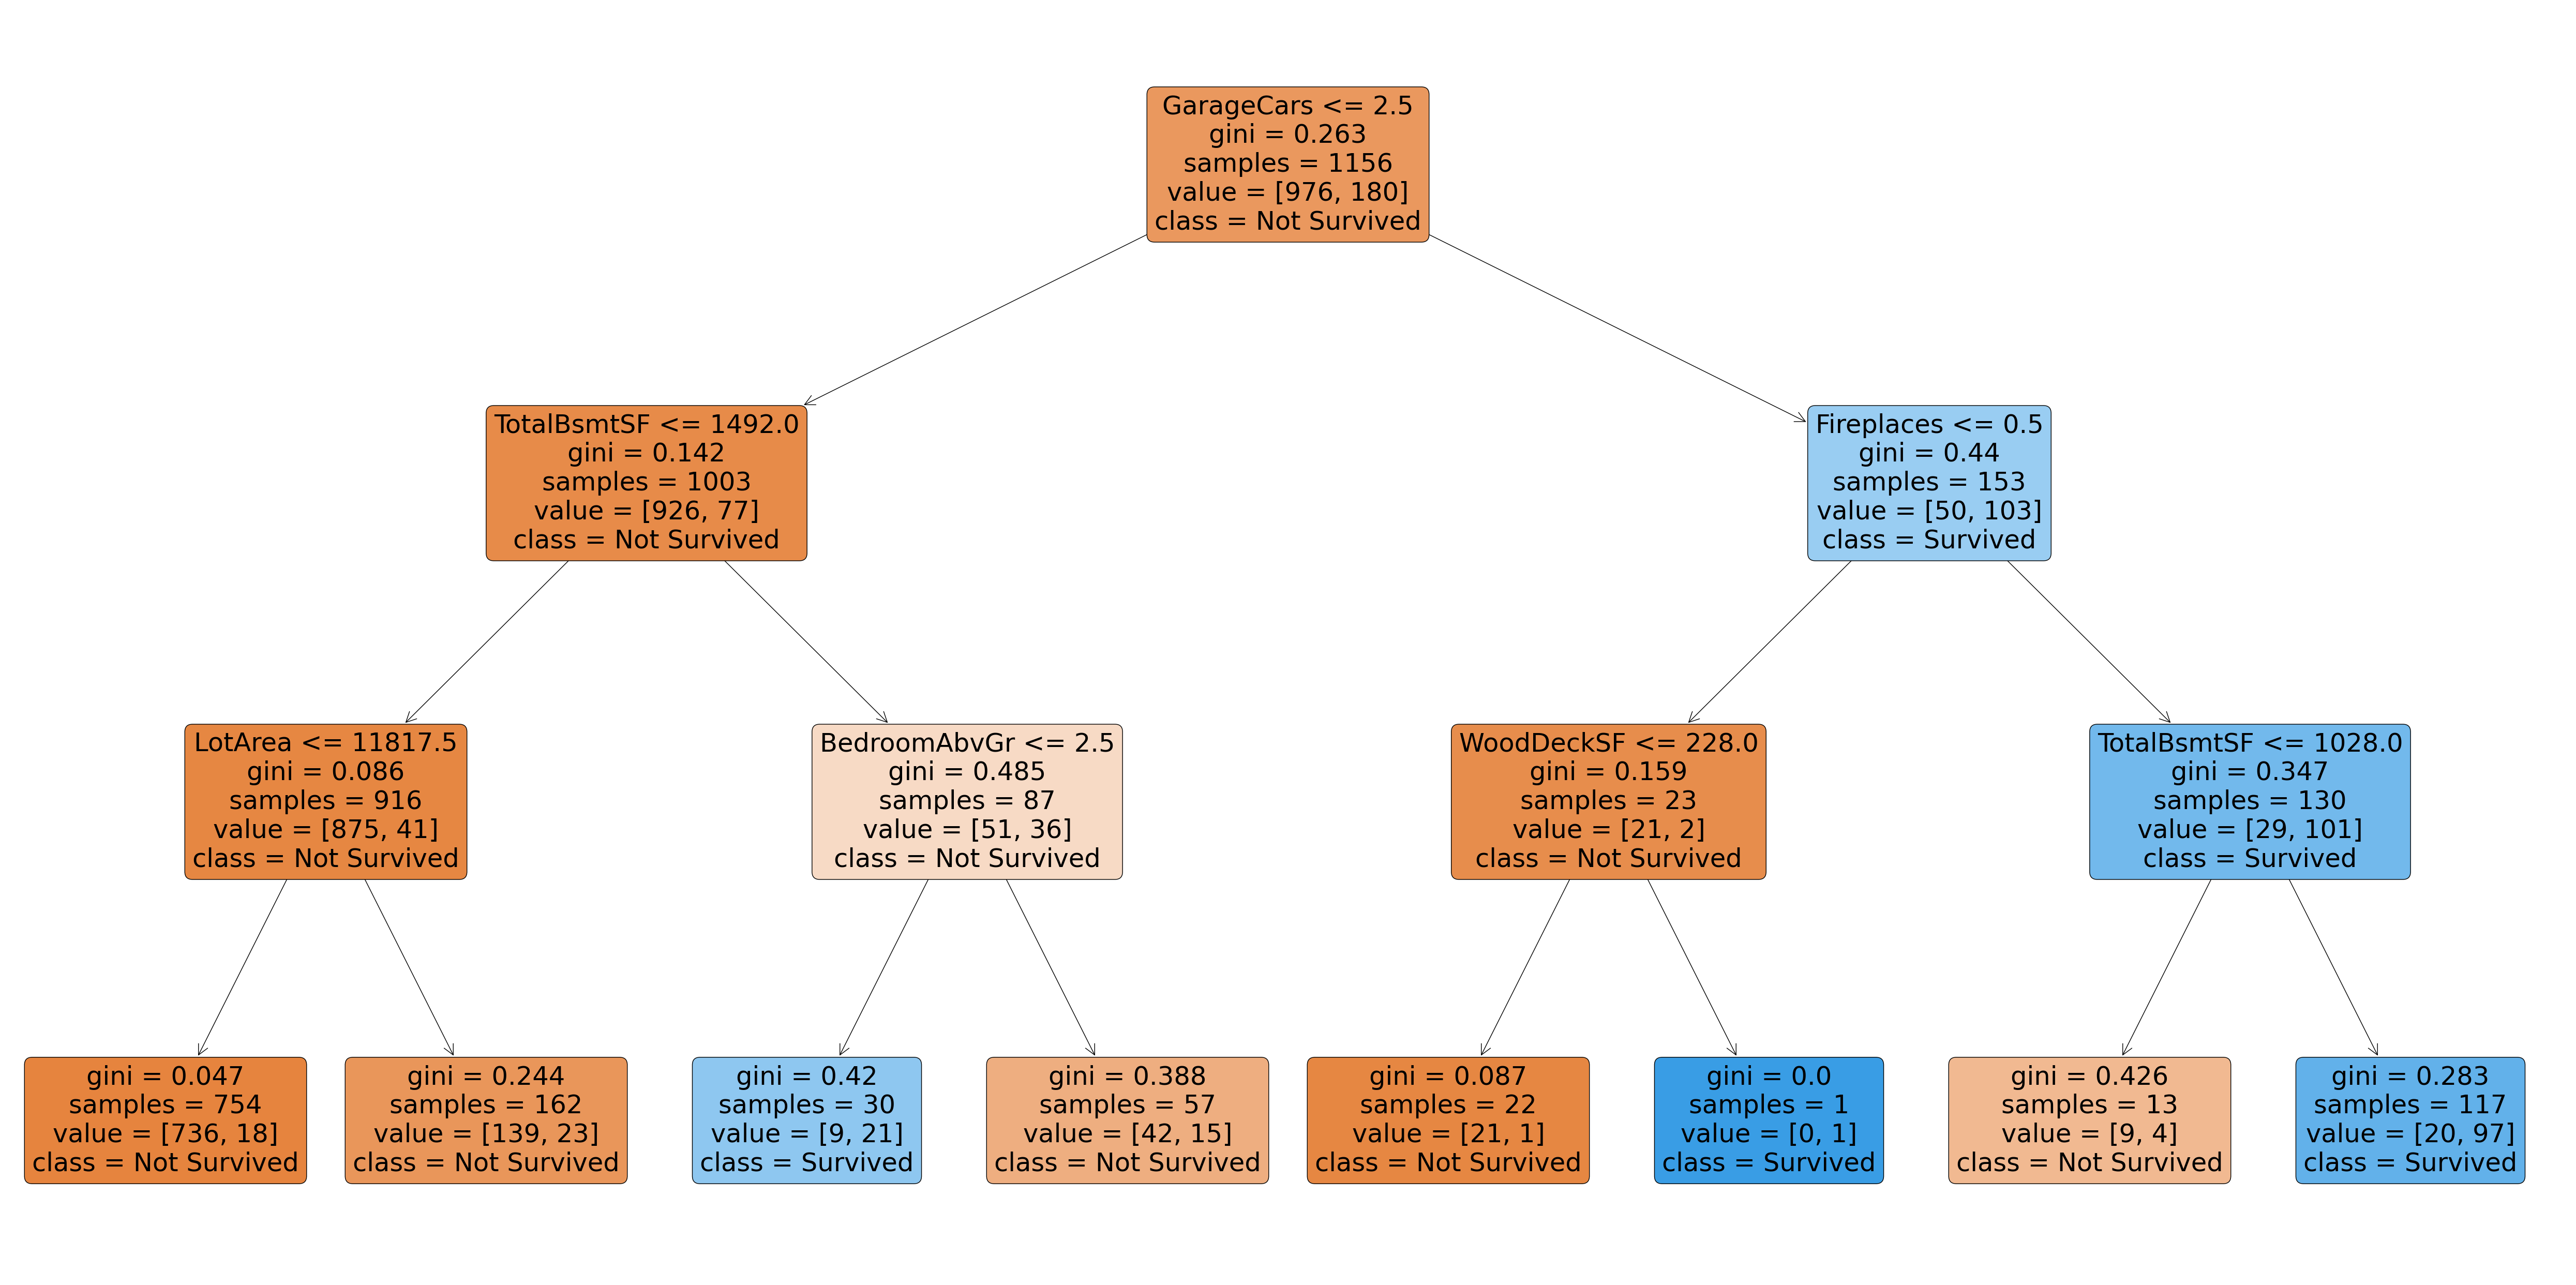

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
    my_house_tree,                          # Decision tree model to visualize
    filled=True,                      # Whether to fill nodes with colors based on majority class
    rounded=True,                     # Whether to round the corners of the nodes
    class_names=['Not Survived','Survived'],  # Names of the classes for the target variable
    feature_names=X.columns       # Names of the features (columns) in your dataset
);


# 3.Pipeline creation

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

### Initialize transformer and model

In [ ]:
imputer = SimpleImputer(strategy="median")
htree = DecisionTreeClassifier(max_depth=4,
                               min_samples_leaf=10,
                               random_state=42)

### Create a Pipeline

In [ ]:
pipe = make_pipeline(imputer, htree).set_output(transform='pandas')

In [ ]:
from sklearn.pipeline import Pipeline
pipe_2 = Pipeline([("imputer", imputer), ("classifier", htree)]).set_output(transform='pandas')

### Fit the pipeline to the training data

In [ ]:
pipe.fit(X_train, y_train)

If you want pipe steps presented like text:

In [ ]:
from sklearn import set_config

set_config(display="text")
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=10,
                                        random_state=42))])

In [ ]:
set_config(display="diagram")
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=10,
                                        random_state=42))])

### Use the pipeline to make predictions

In [ ]:
pipe.predict(X_test)

## Use GridSearchCV to find the best parameters of the model

In [ ]:
# 1. initialize transformers & model without specifying the parameters
imputer = SimpleImputer()
htree = DecisionTreeClassifier()

In [ ]:
# 2. Create a pipeline
pipe = make_pipeline(imputer, htree).set_output(transform='pandas')

In [ ]:
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

To define the parameter grid for cross validation, you need to create a dictionary, where:

- The keys are the name of the pipeline step, followed by two underscores and the name of the parameter you want to tune.
- The values are lists (or "ranges") with all the values you want to try for each parameter.

In [ ]:
param_grid = {
    'decisiontreeclassifier__max_depth': range(2, 14),
    'decisiontreeclassifier__min_samples_leaf': range(4, 10, 2),
    'decisiontreeclassifier__min_samples_split': range(4, 40, 5),
    'decisiontreeclassifier__criterion':['gini', 'entropy']
    }

When defining the cross validation, we want to pass our pipeline (`pipe`), our parameter grid (`param_grid`) and the number of folds (an arbitrary number, usually 5 or 10). You can also define the parameter `verbose` if you want to recieve a bit more info about the CV task.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
search = GridSearchCV(pipe, # you have defined this beforehand
                      param_grid, # your parameter grid
                      cv=5, # the value for K in K-fold Cross Validation
                      scoring='accuracy', # the performance metric to use,
                      verbose=1) # we want informative outputs during the training process

Fit your "search" to the training data (`X` and `y`), as we used to do with our model alone or with our pipeline:

In [ ]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 14),
                         'decisiontreeclassifier__min_samples_leaf': range(4, 10, 2),
                         'decisiontreeclassifier__min_samples_split': range(4, 40, 5)},
             scoring='accuracy', verbose=1)

Explore the best parameters and the best score achieved with your cross validation:

In [ ]:
search.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 4,
 'decisiontreeclassifier__min_samples_leaf': 4,
 'decisiontreeclassifier__min_samples_split': 4}

In [ ]:
# the mean cross-validated score of the best estimator
search.best_score_

0.9178272876548739

In [ ]:
# training accuracy
y_train_pred = search.predict(X_train)

accuracy_score(y_train, y_train_pred)

0.9264705882352942

In [ ]:
# testing accuracy
y_test_pred = search.predict(X_test)

accuracy_score(y_test, y_test_pred)

0.9379310344827586